In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# Novos Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [15]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(7)
service.automf(7)

In [16]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

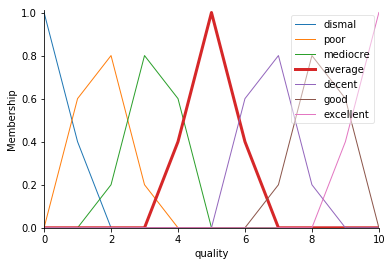

In [17]:
# Visualizando 
quality['average'].view()

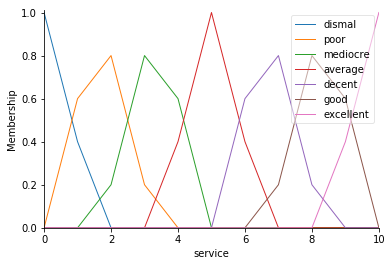

In [18]:
service.view()

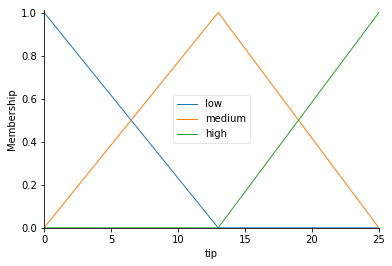

In [19]:
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe16702048>)

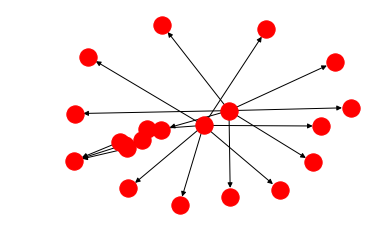

In [20]:
# 1) If the food is poor OR the service is poor, then the tip will be low
# 2) If the service is average, then the tip will be medium
# 3) If the food is good OR the service is good, then the tip will be high.

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe1657de80>)

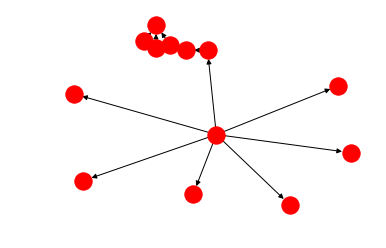

In [21]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe164ebd68>)

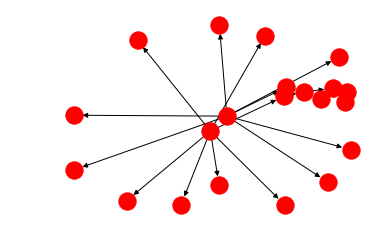

In [22]:
rule3.view()

In [23]:
# Criando sistema  de  controle

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [24]:
# ?
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [26]:
#  Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.35234042553191


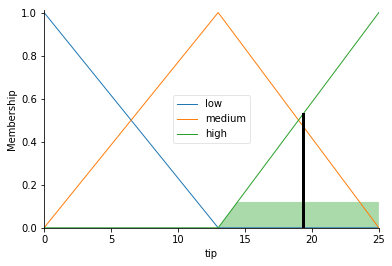

In [30]:
print(tipping.output['tip'])
tip.view(sim=tipping)